In [73]:
import matplotlib
# %matplotlib inline
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
import matplotlib.pyplot as plt

import SUITPy as suit
import surfAnalysisPy as sa
import nibabel as nb
import nitools as nt

import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as am


import selective_recruitment.plotting as splotting
import selective_recruitment.scripts.script_overlap_map_wm as soverlap
import selective_recruitment.scripts.script_roi_similarity as ssimil
import selective_recruitment.plotting as splotting
import selective_recruitment.globals as gl

from statsmodels.stats.anova import AnovaRM # perform F test
from matplotlib.colors import LinearSegmentedColormap
import PcmPy as pcm
from nilearn import plotting
from pathlib import Path

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import ListedColormap
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

# Correlation between forwards and backwards per load per phase

## Parcellation

In [2]:
D = ssimil.calc_corr_per_load(atlas_space = "SUIT3", 
                        subj = None,
                        ses_id = "ses-02", 
                        smooth = False, 
                        parcellation="NettekovenSym68c32", 
                        subtract_mean = True, 
                        type = "CondAll", 
                        verbose = False)

<AxesSubplot: xlabel='load', ylabel='R_fwbw'>

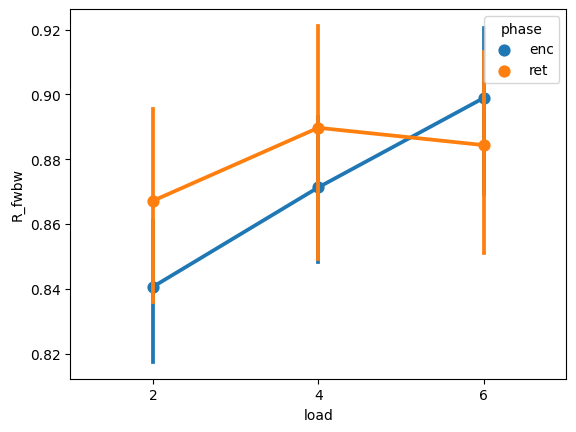

In [3]:
roi_name = "D3R"
DD = D.loc[D.roi_name == roi_name]
sns.pointplot(data = DD, x = "load", y = "R_fwbw", hue = "phase")

## Parcellation divided into anterior and posterior

In [4]:
D = ssimil.calc_corr_per_load(atlas_space = "SUIT3", 
                        subj = None,
                        ses_id = "ses-02", 
                        smooth = False, 
                        parcellation="NettekovenSym68c32AP", 
                        subtract_mean = True, 
                        type = "CondAll", 
                        verbose = False)

In [5]:
# add a new field defining hemi and anterior vs posterior
D["half"] = D["roi_name"].str[-1]
D["hemi"] = D["roi_name"].str[2]
D = D.loc[D.roi != 0]
print(AnovaRM(data=D.loc[D.hemi == "R"], depvar='R_fwbw',
              subject='sn', within=["load", "phase", "half"], aggregate_func=np.mean).fit())

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
load            16.7775 2.0000 30.0000 0.0000
phase           20.4442 1.0000 15.0000 0.0004
half            10.8530 1.0000 15.0000 0.0049
load:phase       6.2008 2.0000 30.0000 0.0056
load:half        2.5546 2.0000 30.0000 0.0945
phase:half       1.7879 1.0000 15.0000 0.2011
load:phase:half  0.1313 2.0000 30.0000 0.8775



<AxesSubplot: xlabel='load', ylabel='R_fwbw'>

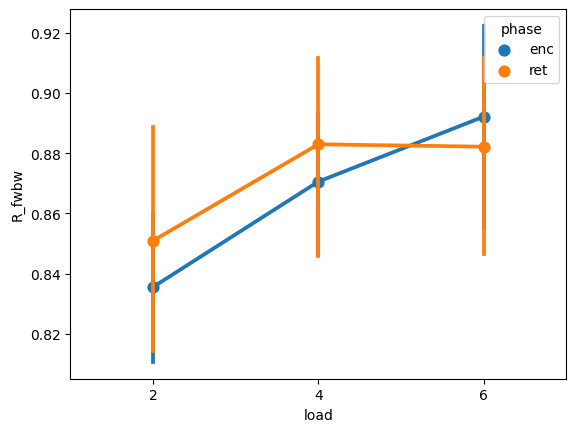

In [6]:
roi_name = "D3R_A"
DD = D.loc[D.roi_name == roi_name]
sns.pointplot(data = DD, x = "load", y = "R_fwbw", hue = "phase")

In [7]:
print(AnovaRM(data=DD, depvar='R_fwbw',
              subject='sn', within=["load", "phase"], aggregate_func=np.mean).fit())

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
load        8.1290 2.0000 30.0000 0.0015
phase       0.1021 1.0000 15.0000 0.7537
load:phase  1.7753 2.0000 30.0000 0.1868



### roi similarity between all the subregions within parcellation

[Text(0, 0.5, 'M1L_A'),
 Text(0, 1.5, 'M1L_P'),
 Text(0, 2.5, 'M2L_A'),
 Text(0, 3.5, 'M2L_P'),
 Text(0, 4.5, 'M3L_A'),
 Text(0, 5.5, 'M3L_P'),
 Text(0, 6.5, 'M4L_A'),
 Text(0, 7.5, 'M4L_P'),
 Text(0, 8.5, 'A1L_A'),
 Text(0, 9.5, 'A1L_P'),
 Text(0, 10.5, 'A2L_A'),
 Text(0, 11.5, 'A2L_P'),
 Text(0, 12.5, 'D1L_A'),
 Text(0, 13.5, 'D1L_P'),
 Text(0, 14.5, 'D2L_A'),
 Text(0, 15.5, 'D2L_P'),
 Text(0, 16.5, 'D3L_A'),
 Text(0, 17.5, 'D3L_P'),
 Text(0, 18.5, 'D4L_A'),
 Text(0, 19.5, 'D4L_P'),
 Text(0, 20.5, 'I1L_P'),
 Text(0, 21.5, 'I2L_A'),
 Text(0, 22.5, 'I2L_P'),
 Text(0, 23.5, 'S1L_A'),
 Text(0, 24.5, 'S1L_P'),
 Text(0, 25.5, 'S2L_A'),
 Text(0, 26.5, 'S2L_P'),
 Text(0, 27.5, 'S3L_A'),
 Text(0, 28.5, 'S3L_P'),
 Text(0, 29.5, 'S4L_A'),
 Text(0, 30.5, 'S4L_P'),
 Text(0, 31.5, 'M1R_A'),
 Text(0, 32.5, 'M1R_P'),
 Text(0, 33.5, 'M2R_A'),
 Text(0, 34.5, 'M2R_P'),
 Text(0, 35.5, 'M3R_A'),
 Text(0, 36.5, 'M3R_P'),
 Text(0, 37.5, 'M4R_A'),
 Text(0, 38.5, 'M4R_P'),
 Text(0, 39.5, 'A1R_A'),
 Text(0, 4

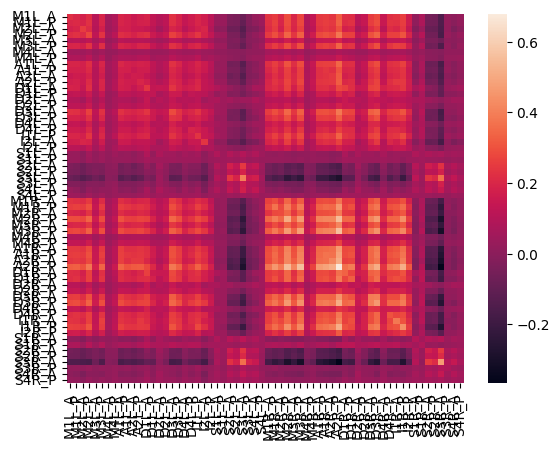

In [8]:
G_all, Ginf_all = ssimil.calc_G(center = False, subj = None, reorder = None, do_D = False)
GG_all = np.mean(G_all, axis = 0)
ax = sns.heatmap(GG_all, annot=False, fmt=".1f")
ax.set_xticks(Ginf_all['region_id'].values-0.5)
ax.set_yticks(Ginf_all['region_id'].values-0.5)
ax.set_xticklabels(labels = Ginf_all['region_name'].values, rotation = 90)
ax.set_yticklabels(labels = Ginf_all['region_name'].values, rotation = 0)

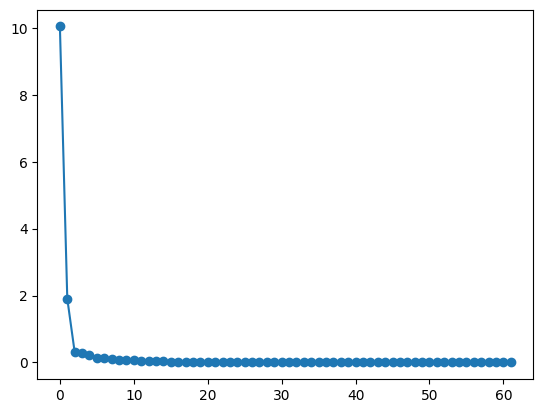

<Figure size 640x480 with 0 Axes>

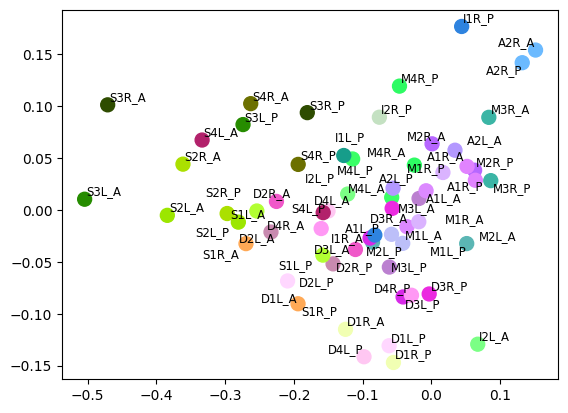

In [19]:
W_all, Glam_all = pcm.classical_mds(GG_all,contrast=None,align=None,thres=0)
# get info for D regions
Dinfo, D_indx, colors_D = ssimil.get_region_info_all(label = 'NettekovenSym68c32AP')
plt.plot(Glam_all, 'o-')
plt.figure()
splotting.plot_MDS(W_all[:, 1], W_all[:, 2], Dinfo[1:], colors_D[1:], text_size = 'small', text_weight = 'regular')

### roi similarity between all the subregions within parcellation limited to D subregions

(16, 16)


[Text(0, 0.5, 'D1L_A'),
 Text(0, 1.5, 'D1L_P'),
 Text(0, 2.5, 'D2L_A'),
 Text(0, 3.5, 'D2L_P'),
 Text(0, 4.5, 'D3L_A'),
 Text(0, 5.5, 'D3L_P'),
 Text(0, 6.5, 'D4L_A'),
 Text(0, 7.5, 'D4L_P'),
 Text(0, 8.5, 'D1R_A'),
 Text(0, 9.5, 'D1R_P'),
 Text(0, 10.5, 'D2R_A'),
 Text(0, 11.5, 'D2R_P'),
 Text(0, 12.5, 'D3R_A'),
 Text(0, 13.5, 'D3R_P'),
 Text(0, 14.5, 'D4R_A'),
 Text(0, 15.5, 'D4R_P')]

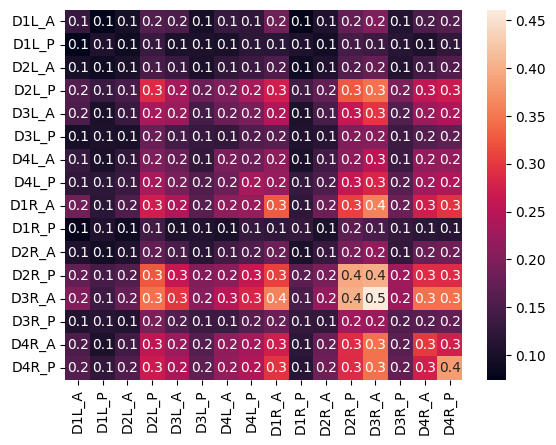

In [55]:
G, Ginf= ssimil.calc_G(center = False, subj = None, reorder = ["side", "AP"], do_D = True)
GG = np.mean(G, axis = 0)
print(GG.shape)
ax = sns.heatmap(GG, annot=True, fmt=".1f")
ax.set_xticks(Ginf['region_id'].values+0.5)
ax.set_yticks(Ginf['region_id'].values+0.5)
ax.set_xticklabels(labels = Ginf['region_name'].values, rotation = 90)
ax.set_yticklabels(labels = Ginf['region_name'].values, rotation = 0)

(16, 16)


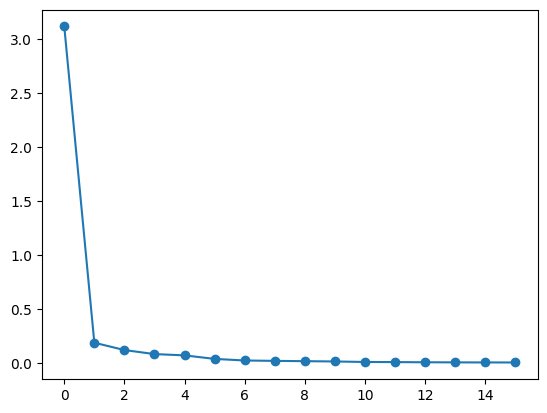

<Figure size 640x480 with 0 Axes>

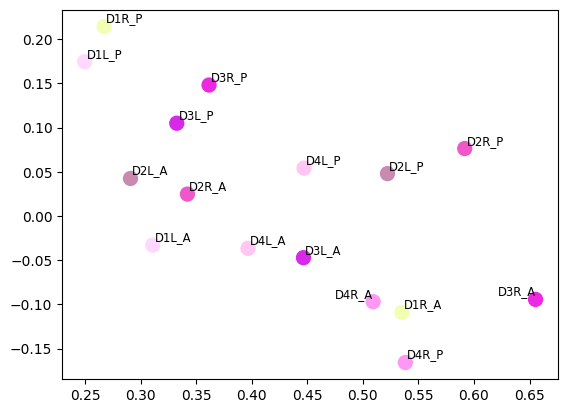

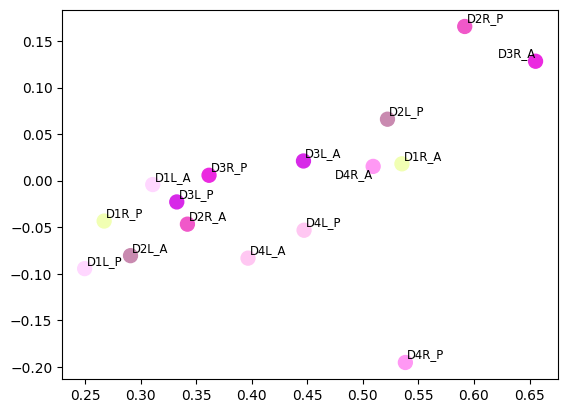

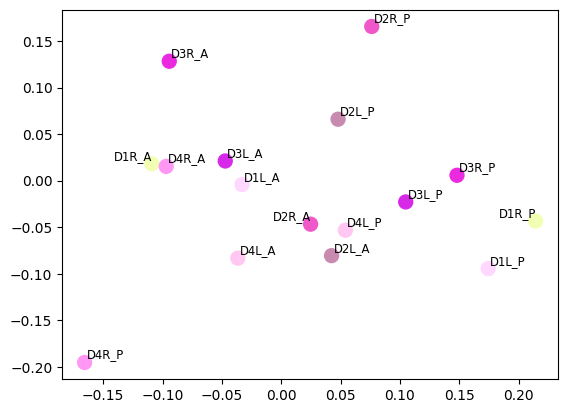

In [52]:
W, Glam = pcm.classical_mds(GG,contrast=None,align=None,thres=0)
# get info for D regions
Dinfo, D_indx, colors_D = ssimil.get_region_info(label = 'NettekovenSym68c32AP')
plt.plot(Glam, 'o-')
plt.figure()
print(W.shape)
splotting.plot_MDS(W[:, 0], W[:, 1], Dinfo, colors_D, text_size = 'small', text_weight = 'regular')
splotting.plot_MDS(W[:, 0], W[:, 2], Dinfo, colors_D, text_size = 'small', text_weight = 'regular')
splotting.plot_MDS(W[:, 1], W[:, 2], Dinfo, colors_D, text_size = 'small', text_weight = 'regular')

In [86]:
# adding the components to the D region info dataframe
Dinfo["comp_0"] = W[:, 0]
Dinfo["comp_1"] = W[:, 1]
Dinfo["comp_2"] = W[:, 2]
# add index
Dinfo["idx"] = Dinfo["region_name"].str[1].astype(int)
Dinfo

fig = px.scatter_3d(Dinfo, x="comp_0", y="comp_1", z="comp_2", color = "anterior", symbol='idx')
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## using RSA toolbox and D3 RDM as model RDM

In [87]:
import rsatoolbox as rsa

In [93]:
label = 'NettekovenSym68c32AP'
Dinfo, D_indx, colors_D = ssimil.get_region_info(label = label)
# get data
# preparing the data and atlases for all the structures
Data = fdata.get_dataset_class(gl.base_dir, dataset="WMFS")

# get the data tensor
tensor, info, _ = fdata.get_dataset(gl.base_dir, subj = None,
                                    dataset="WMFS",atlas="SUIT3",
                                    sess="ses-02",type="CondRun", info_only=False)

# create atlas object
atlas, _ = am.get_atlas("SUIT3",gl.atlas_dir)

# make the label name for cerebellar parcellation
label_file = f"{gl.atlas_dir}/tpl-SUIT/atl-{label}_space-SUIT_dseg.nii"


# get parcels in the atlas
# label_vec, labels = atlas_suit.get_parcel(lable_file)

# read label lookup table
idx_label, colors, label_names = nt.read_lut(f"{gl.atlas_dir}/tpl-SUIT/atl-{label}.lut")

for roi in ["D3R_A"]:

    # get the index for the selected label
    ## the first label is 0, discarding it ...
    i = label_names[1:].index(roi)
    # get parcels 
    label_vector, labels = atlas.get_parcel(label_file)

    # create a mask for the voxels within the selected label
    label_mask = label_vector == i

    # loop over subject and do rsa within the selected region
    n_subj = tensor.shape[0]

    data_region = tensor[:, :, label_mask]
    print(data_region.shape)

    # get different dimensions of the data
    n_subj = data_region.shape[0]
    n_cond = data_region.shape[1]
    n_region = parcel_data.shape[2]

# # create rsa dataset objects 
# data_rsa = []
# for s in range(n_subj):
#     des = {'session': 1, 'subj': s}
#     chn_des = {'conds': info.cond_name.values}
#     obs_des = {'voxels': Dinfo.region_name.values}

#     data_rsa.append(rsa.data.Dataset(measurements=parcel_data[s, :, :].T,
#                             descriptors=des,
#                             obs_descriptors=obs_des,
#                             channel_descriptors=chn_des))

(16, 60, 230)
